# Homework 1
Dear students, the first homework will be on regression. You need to choose a dataset on kaggle (choose not Titanic and Iris, but something more interesting) and do preprocessing, statistical analysis, evaluate the model using OLS and check for multicollinearity, autocorrelation and heteroscedasticity, as well as evaluate the model using 5 different regression methods and choose the best one.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset: https://www.kaggle.com/altruistdelhite04/gold-price-data

In [11]:
gold = pd.read_csv (r'C:\Users\Александра\Downloads\gld_price_data.csv') 
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


'date' represents the date in a format Month/Day/Year

'SPX' - capitalization index of the 500 leading publicly traded companies in the US

'GLD' - gold price (what we are going to predict) 

'USO' - US oil prices for given dates 

'SLV' - silver price value

'EUR/USD' - currency pair of euros and dollars, e.g. in the 1st column 1 euro = 1.471692 dollars, i.e. Euro to US dollar exchange ratio

In [12]:
gold = gold.rename(columns={'EUR/USD': 'EURUSD'})

In [13]:
gold = gold.drop(columns=['Date']) 

In [14]:
gold.info()  #some basic informations about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     2290 non-null   float64
 1   GLD     2290 non-null   float64
 2   USO     2290 non-null   float64
 3   SLV     2290 non-null   float64
 4   EURUSD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [15]:
gold.describe() # getting the statistical measures of the data

,SPX,GLD,USO,SLV,EURUSD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold.isnull().sum() # checking the number of missing values

SPX       0
GLD       0
USO       0
SLV       0
EURUSD    0
dtype: int64

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


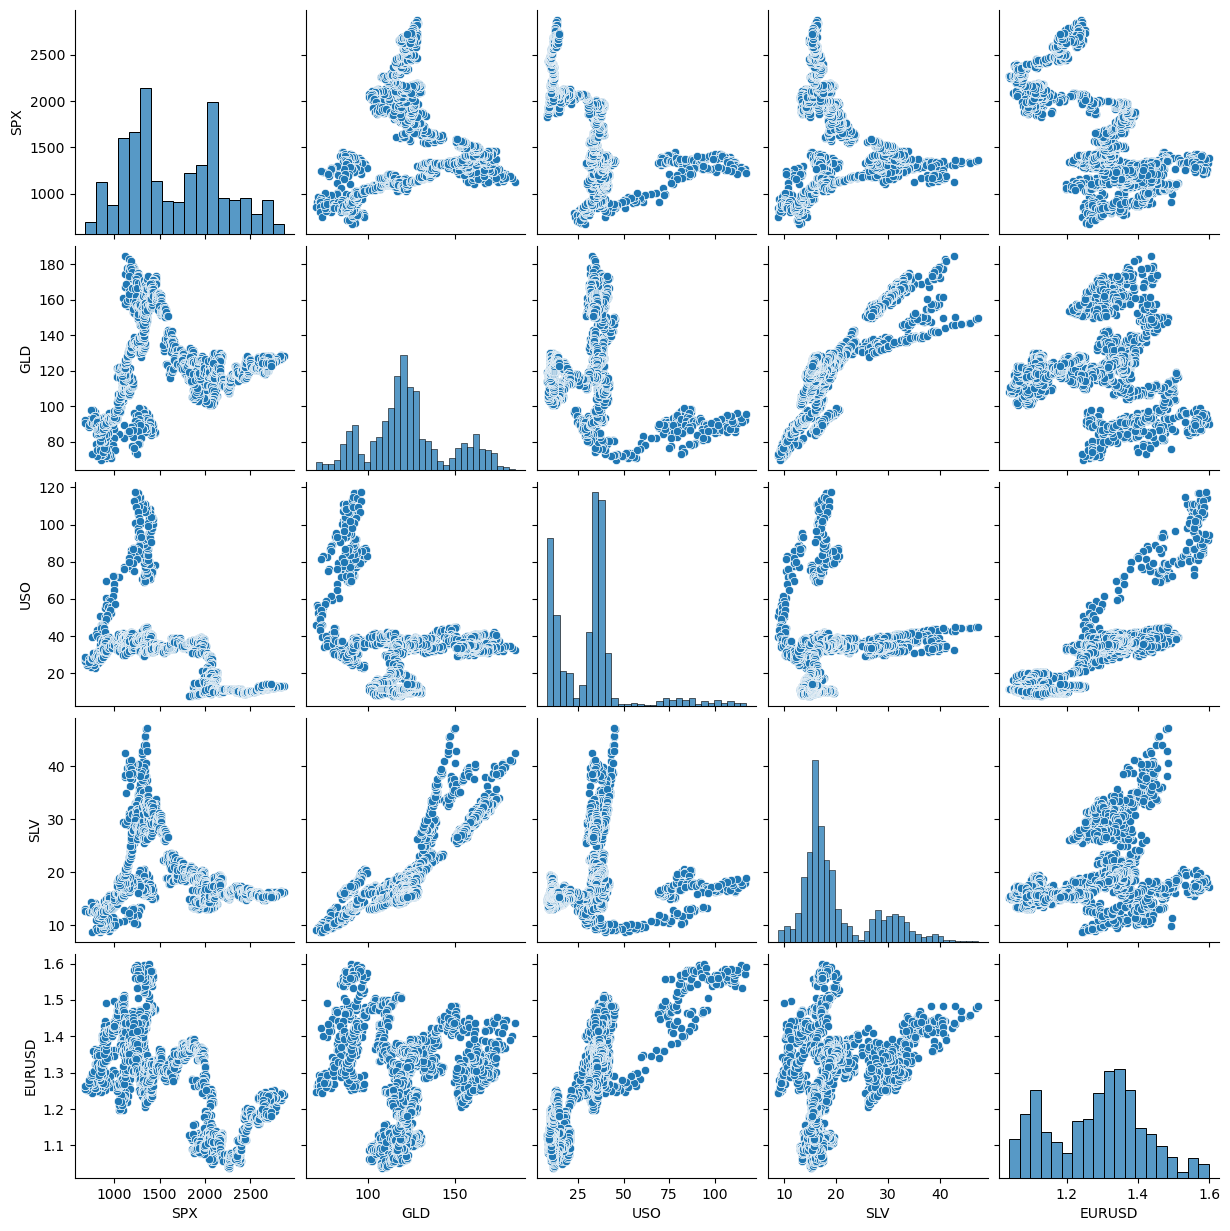

In [18]:
sns.pairplot(gold)

In [19]:
correlation = gold.corr()

<Axes: >

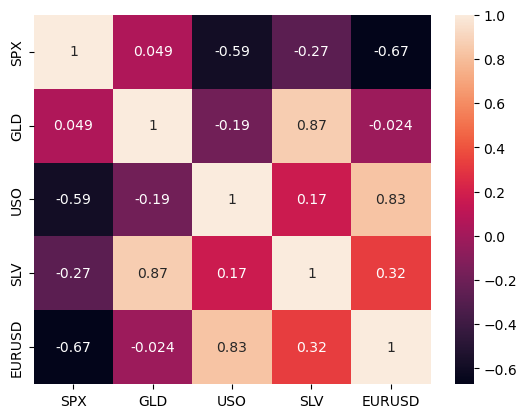

In [20]:
sns.heatmap(gold.corr(), annot=True) # constructing a heatmap in order to understand the correlatiom

In [21]:
print(correlation['GLD']) # correlation values of GLD

SPX       0.049345
GLD       1.000000
USO      -0.186360
SLV       0.866632
EURUSD   -0.024375
Name: GLD, dtype: float64


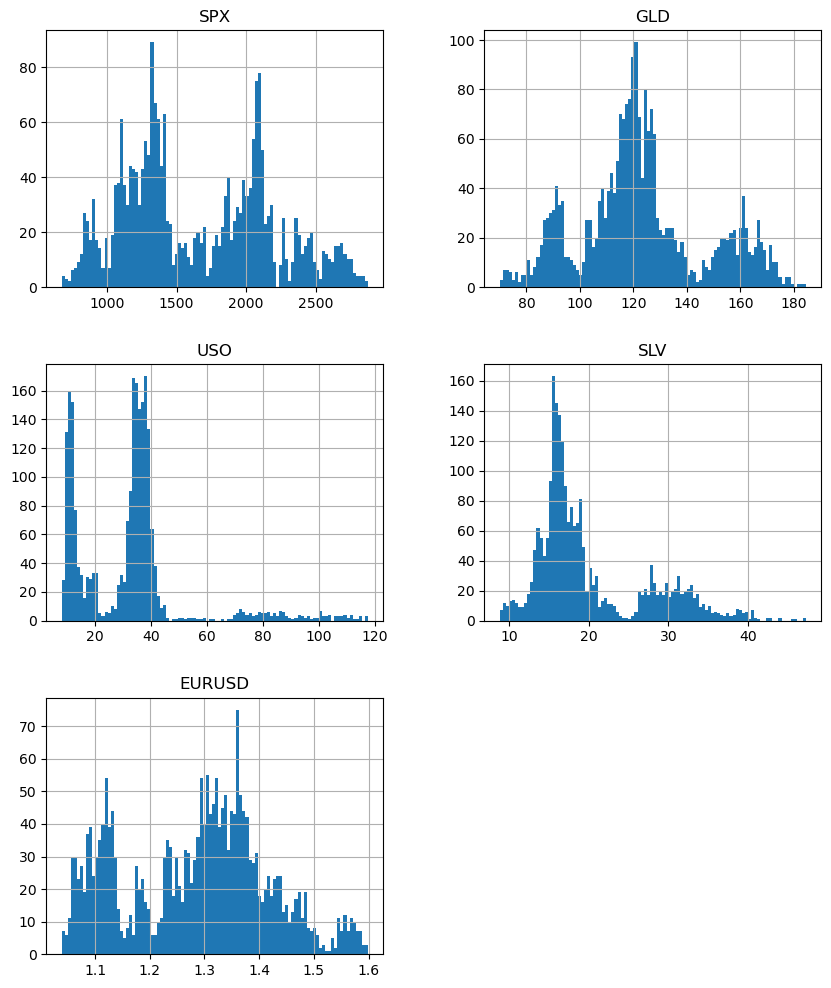

In [22]:
gold.hist(bins=100, figsize=(10,12)) #distribution of data
plt.show()

<Axes: xlabel='GLD', ylabel='Count'>

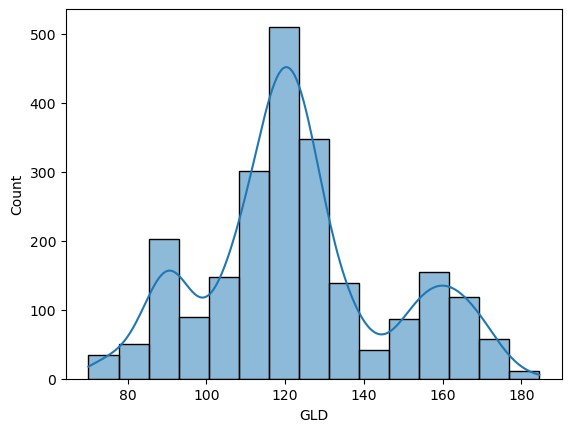

In [23]:
sns.histplot(gold['GLD'], kde=True, bins=15) #distribution of gold price 

# Training a first model -  Linear Regression Model

In [24]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(0)
df_train,df_test=train_test_split(gold,train_size=0.7,test_size=0.3,random_state=100) #Splitting into Training data and Test Data

In [25]:
df_train_y = df_train['GLD']
df_train_X = df_train.drop('GLD', axis=1)
df_test_y = df_test['GLD']
df_test_X = df_test.drop('GLD', axis=1)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
first_model = LinearRegression() 
first_model.fit(df_train_X, df_train_y)
y_pred = first_model.predict(df_test_X)

In [30]:
results = smf.ols('GLD ~ SPX + USO + SLV + EURUSD', data=gold).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     4246.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:07:59   Log-Likelihood:                -8015.9
No. Observations:                2290   AIC:                         1.604e+04
Df Residuals:                    2285   BIC:                         1.607e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7963      3.277     21.302      0.000      63.371      76.222
SPX            0.0067      0.000     15.139      0.000       0.006       0.008
USO           -0.2508      0.016    -15.943      0.000      -0.282      -0.220
SLV            3.1570      0.026    123.534      0.000       3.107       3.207
EURUSD       -10.5222      2.591     -4.061      0.000     -15.603      -5.442
==============================================================================
Omnibus:                      719.027   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3375.648
Skew:                          -1.429   Prob(JB):                         0.00
Kurtosis:                       8.216   Cond. No.                     4.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 R-squared = 0.881

# Training a second model - Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
X = gold.drop(columns = ["GLD"])
print(X)

              SPX        USO      SLV    EURUSD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
Y = gold["GLD"]
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) #Splitting into Training data and Test Data

In [41]:
regressor = RandomForestRegressor(n_estimators=100)

In [42]:
regressor.fit(X_train, Y_train) # training the model

RandomForestRegressor()

In [43]:
test_data_prediction = regressor.predict(X_test)

In [44]:
print(test_data_prediction)

[164.62599909 127.54989884 124.23369977 119.6335994  126.03209896
  85.85309812 171.72580198 136.29620006 106.77750093 133.0664016
 120.53699934 124.80870054 143.33359783 104.54719992  80.88019922
 120.33999987 140.25080058  90.45650042  91.44589935 128.23990164
 125.67839942 147.7004     116.91950169 153.00789919 129.60179858
 129.3998007  118.11690117 111.42150037 167.86610258 157.86149791
 125.91260192 153.87230129 126.93619969 122.46089782 116.49340153
 154.71969915 114.86180001 120.52240154 103.73720215 105.17880036
 134.79939885  85.60989959 155.98550004 121.41159972 122.41060076
 155.28220047 120.53799975 116.41139965 168.4252024  116.56340068
 138.09850238 161.79709852 157.66580049 153.18380032 124.01520002
 117.09210023 167.2605     117.16520025 165.78500058  84.29319972
 121.35369917 122.24960019 120.12959999 171.92729949 119.1207995
 180.39759666 161.98240318 139.52590239 115.67440016  92.64350049
 171.84490023 117.72129977 117.73509859 125.61439997 147.06079959
  91.1223011

In [45]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R-squared =', error_score)

R-squared = 0.9850872411667093


In [46]:
MAE_score = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('MAE =', MAE_score)

MAE = 1.401391484912662


In [47]:
MSE_score = metrics.mean_squared_error(Y_test, test_data_prediction)
print('MSE =', MSE_score)

MSE = 8.997628039206067


# Training a third model - LASSO Regression

In [52]:
from sklearn.linear_model import Lasso

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [54]:
lasso = Lasso (alpha=1.0)

In [55]:
lasso.fit(X_train, Y_train)

Lasso()

In [56]:
y_pred = lasso.predict(X_test)

In [57]:
y_pred

array([149.8251495 , 125.31542691, 121.28779651, 110.7945078 ,
       122.22648322,  88.90566368, 161.95407573, 146.57010166,
       111.38895282, 123.20719648, 120.28410633, 118.89973421,
       173.95483364, 112.00694121,  87.76867865, 120.43816877,
       164.59610045,  96.27836636,  96.16120148, 128.88492058,
       120.29441297, 179.92994465, 111.06461614, 142.6998357 ,
       127.28434818, 122.95165505, 117.88667747, 114.15643389,
       158.69420288, 148.65693236, 121.86765976, 145.99267394,
       125.95560004, 121.88223121, 110.91136164, 144.71049381,
       116.37236746, 122.69195577, 101.41325343, 111.00019538,
       137.67212567,  92.73837344, 148.72552934, 119.8392109 ,
       121.00849543, 141.60061553, 121.28996173, 118.20598346,
       153.88485902, 118.84782096, 141.87584552, 153.50770882,
       148.64079157, 141.04833128, 118.15718487, 123.03833365,
       158.17334178, 122.6107274 , 158.12711099,  88.02972767,
       123.09905696, 120.6836685 , 125.39904806, 161.96

In [58]:
print ('Slope: %.2f' % lasso.coef_[0])

Slope: 0.01


In [59]:
print ('Intercept: %.2f' % lasso.intercept_)

Intercept: 57.99


In [60]:
MAE_score = metrics.mean_absolute_error(Y_test, y_pred)
print('MAE =', MAE_score)

MAE = 6.154535810855454


In [61]:
MSE_score = metrics.mean_squared_error(Y_test, y_pred)
print('MSE =', MSE_score)

MSE = 68.5015043816873


In [62]:
error_score = metrics.r2_score(Y_test, y_pred)
print('R-squared =', error_score)

R-squared = 0.8864649205201143


# Training a forth model - Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [65]:
ridge = Ridge(alpha=1.0)

In [66]:
ridge.fit(X_train, Y_train)

Ridge()

In [67]:
y_pred = ridge.predict(X_test)

In [68]:
y_pred

array([150.29882591, 124.60566311, 120.67962802, 111.81921814,
       121.05835469,  88.45661692, 162.70378317, 146.68895047,
       111.89988265, 122.93332945, 119.57275846, 118.07270884,
       174.05951233, 112.7849923 ,  87.20351107, 119.75206748,
       164.63132834,  95.84913316,  95.35199888, 129.29884121,
       120.19962823, 179.66915927, 111.09257734, 143.19971341,
       126.52645637, 121.9351608 , 117.0721235 , 114.84960961,
       158.79727353, 148.53954426, 120.9818611 , 146.34601199,
       124.91092476, 121.24262685, 110.94388545, 145.22675282,
       116.89550223, 122.34941922, 100.82254473, 111.34435432,
       138.06615943,  92.5542812 , 149.31182772, 119.18587373,
       121.07621424, 142.6265072 , 121.8140903 , 118.96640796,
       154.37993155, 118.00570372, 142.46484256, 153.59572417,
       148.88439368, 142.07059937, 117.39199941, 123.83931005,
       158.95898682, 123.34406421, 158.77400554,  87.01795905,
       122.7878369 , 120.85565535, 126.03081085, 162.76

In [69]:
print ('Slope: %.2f' % ridge.coef_[0])

Slope: 0.01


In [70]:
print ('Intercept: %.2f' % ridge.intercept_)

Intercept: 69.01


In [71]:
MAE_score = metrics.mean_absolute_error(Y_test, y_pred)
print('MAE =', MAE_score)

MAE = 6.18616365466246


In [72]:
MSE_score = metrics.mean_squared_error(Y_test, y_pred)
print('MSE =', MSE_score)

MSE = 67.7516414122793


In [73]:
error_score = metrics.r2_score(Y_test, y_pred)
print('R-squared =', error_score)

R-squared = 0.8877077509163109


# Training a fith model - ElasticNet Regression

In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [81]:
enet = ElasticNet (alpha=1.0, l1_ratio=0.5)

In [82]:
enet.fit(X_train, Y_train)

ElasticNet()

In [83]:
y_pred = enet.predict(X_test)

In [84]:
y_pred

array([149.63136743, 125.26780458, 121.29772421, 110.90444254,
       122.23241562,  89.17531644, 161.67032652, 146.3923875 ,
       111.53663414, 123.19408819, 120.28555742, 118.89385024,
       173.56044965, 112.10820653,  88.07350799, 120.45706072,
       164.27731846,  96.52103046,  96.37617378, 128.88039075,
       120.34029245, 179.48836   , 111.16668372, 142.54935654,
       127.23086128, 122.92291874, 117.90168587, 114.24203617,
       158.43986407, 148.48878607, 121.87713473, 145.82432756,
       125.9246914 , 121.87298242, 111.01095316, 144.54580528,
       116.43276403, 122.70896419, 101.59112219, 111.12683047,
       137.57349939,  92.81768397, 148.52706099, 119.84144859,
       121.06897077, 141.46918024, 121.34238019, 118.25133068,
       153.65851887, 118.85159325, 141.74115734, 153.28048661,
       148.48575618, 140.93229179, 118.15399167, 123.06377643,
       157.92960247, 122.64451239, 157.8845914 ,  88.30987482,
       123.11033528, 120.74671754, 125.41090062, 161.68

In [85]:
print ('Slope: %.2f' % enet.coef_[0])

Slope: 0.01


In [86]:
print ('Intercept: %.2f' % enet.intercept_)

Intercept: 58.68


In [87]:
MAE_score = metrics.mean_absolute_error(Y_test, y_pred)
print('MAE =', MAE_score)

MAE = 6.2064825600270215


In [88]:
MSE_score = metrics.mean_squared_error(Y_test, y_pred)
print('MSE =', MSE_score)

MSE = 68.89732090664826


In [89]:
error_score = metrics.r2_score(Y_test, y_pred)
print('R-squared =', error_score)

R-squared = 0.8858088902471075


# Models Comparison with R-Square Approach

1st model R-squared = 0.881

2nd model R-squared = 0.985

3rd model R-squared = 0.886

4th model R-squared = 0.888

5th model R-squared = 0.888



With the R-Squared approach, we can choose the best regression equation that has the highest R-Squared value, so this would be the Random Forest Regressor